In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
import numpy as np

In [2]:
IMAGE_SIZE = [224,224]

In [5]:
train_path = '/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train'
test_path = '/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/valid'

In [6]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape= IMAGE_SIZE + [3])

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
for layer in resnet.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train/*')

In [9]:
folders

['/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train/Tomato___healthy']

In [10]:
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(resnet.input, prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5548 images belonging to 3 classes.


In [20]:
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/Tomato_Leaves_Resnet/Dataset/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1386 images belonging to 3 classes.


In [24]:
model_fit = model.fit_generator(training_set,steps_per_epoch= len(training_set), epochs=2, verbose=1, validation_data=testing_set,
                                validation_steps=len(testing_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
174/174 [==============================] - 1455s 8s/step - loss: 0.7667 - accuracy: 0.6678 - val_loss: 0.4995 - val_accuracy: 0.7987
Epoch 2/2
174/174 [==============================] - 73s 418ms/step - loss: 0.5150 - accuracy: 0.7916 - val_loss: 0.7826 - val_accuracy: 0.7128


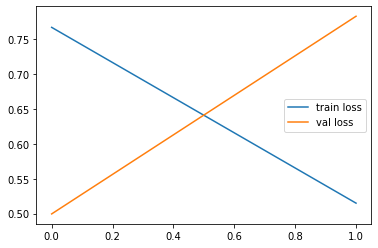

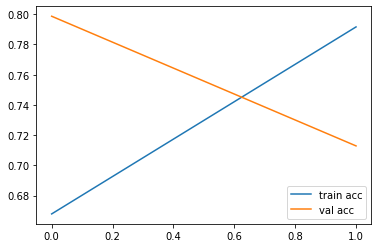

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss_Val_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Acc_Val_acc')

In [28]:
from tensorflow.keras.models import load_model

model_save = model.save("Tomaeto_Leaf_Prediction_ResNet50.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [29]:
y_pred = model.predict(testing_set)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 1, ..., 2, 2, 1])

In [31]:
model = load_model('Tomaeto_Leaf_Prediction_ResNet50.h5')